# Gaussian Naive Bayes

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# Model ve Tahmin

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [5]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
# NB algoritmasında da optimize edilecek bir model hiperparametresi yok.
# yine train hatasını elde etmiş ve buna göre hareket etmiş olacağız

In [8]:
nb = GaussianNB()

In [10]:
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [12]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

## -----------------------------Önemli Not-----------------------------

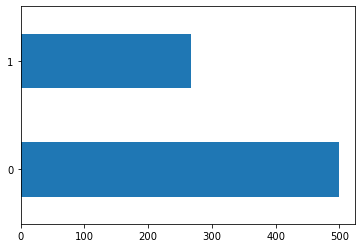

In [13]:
df["Outcome"].value_counts().plot.barh();

#### Önceki bölümlerden farklı olarak test setimizin boyutunu 0.3'e çıkarmamızın sebebi elimizdeki veri setinin dağılışındaki problemle alakalı.

#### Elimizde 500 tane 0 kategorisinden eleman varken 268 tane 1 kategorisinden eleman var. 

#### Burada zaten az olan 1 kategorisindeki elemanların 0.25 kalmış olan test setine daha da az dağılması algoritma ölçümünde işimiz zorlaştıracaktır.

### Bu konuda normalde yani gerçek hayatta yapılan bir modelde test ve train setlerinin içindeki eleman dağılımlarının iyi olup olmadığını kontrol etmek gerekmektedir.

## ---------------

In [14]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [15]:
# test hatasını hesaplama

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [19]:
y_pred = nb_model.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [24]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

In [25]:
# naive bayes için de dediğimiz gibi model tuning aşamamız yok. burada da model tuning = model doğrulama